In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url_train = 'development_dataset.csv' #traing dataset
url_dict = 'Data_Dictionary.xlsx' #data dictionary

In [ ]:
## making dataframe

df_train = pd.read_csv(url_train)
df_dict = pd.read_excel(url_dict)
df_lead = pd.read_csv('leaderboard_dataset.csv')

##### Missing Values





In [ ]:
#Required Imports

#from sklearn.preprocessing import Imputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#from sklearn.impute import SimpleImputer

# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

# Techinques
# 1 - df.fillna()
# 2 - impute using sklearn - mean,meadian,mode
# 3 - interpolation 
# 4 - LDA analysis

In [ ]:
df_train = df_train.replace(to_replace = '.', value =np.nan)
df_lead = df_lead.replace(to_replace = '.', value =np.nan)

In [ ]:
itrImputetrain = IterativeImputer(max_iter=10, random_state=0)

# Imputing 
itrImputetrain = itrImputetrain.fit(df_train.iloc[:, 1:20].values)
df_train.iloc[:, 1:20] = itrImputetrain.fit_transform(df_train.iloc[:, 1:20].values)

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [ ]:
itrImputelead = IterativeImputer(max_iter=10, random_state=0)

# Imputing 
itrImputelead = itrImputelead.fit(df_lead.iloc[:, 1:20].values)
df_lead.iloc[:, 1:20] = itrImputelead.fit_transform(df_lead.iloc[:, 1:20].values)

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [ ]:
X = df_train.iloc[:, 1:-1].values
y = df_train.iloc[:, 20].values

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
#X[:, 11] = labelencoder_X.fit_transform(X[:, 11])

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
y

array([1, 0, 2, ..., 1, 1, 0])

In [ ]:
df_exp = df_train

In [ ]:
def get_percentage_missing(series):
    """ Calculates percentage of NaN values in DataFrame
    :param series: Pandas DataFrame object
    :return: float
    """
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 2)

In [ ]:
df_with_any_null_values = df_train[df_train.columns[df_train.isnull().any()].tolist()]

In [ ]:
get_percentage_missing(df_with_any_null_values)

Series([], dtype: float64)

##### Removing Outliers

In [ ]:
### Function to Removing Outliers

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
print(len(df_train))
print(len(df_train['VAR4']))

34000
34000


In [ ]:
df_exp.columns

Index(['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9',
       'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR17',
       'VAR18', 'VAR19', 'VAR20', 'VAR21'],
      dtype='object')

In [ ]:
df_exp.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,60.838511,58.632548,0.279273,100.083403,1.000000,1.000000,1.000000,1.540594,852.082798,1.0,0.0,100.104991,Low
1,2,911.764706,0.027778,240.807915,611.574748,8.181818,1.344479,198.600020,22.086661,49.712103,5.718678,15.012510,11.269208,1.000000,12.020512,1.614613,883.542803,0.0,1.0,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,56.249809,58.632548,0.453212,210.175146,10.000000,1.000000,10.000000,1.044599,728.386869,0.0,0.0,98.249570,Medium
3,4,892.941177,0.754295,235.205328,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,4.441089,133.762442,8.806072,1.000000,9.790151,1.145729,925.270009,1.0,0.0,140.862306,Low
4,5,914.117647,0.083333,196.296807,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,5.235281,210.175146,11.451540,1.265888,12.330236,1.558341,713.026761,1.0,0.0,101.268503,High


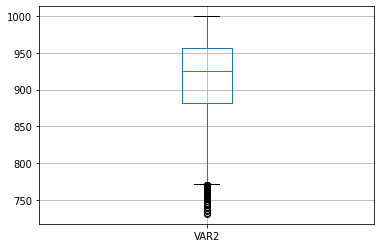

In [ ]:
df_train.boxplot(column = 'VAR2')

In [ ]:
print(len(df_exp.loc[(df_exp['VAR2'] > 770) & (df_exp['VAR2'] < 1000)]))
df_exp = df_exp.loc[(df_exp['VAR2'] > 770) & (df_exp['VAR2'] < 1000)]

33257


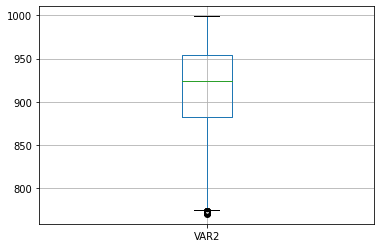

In [ ]:
df_exp.boxplot(column = 'VAR2')

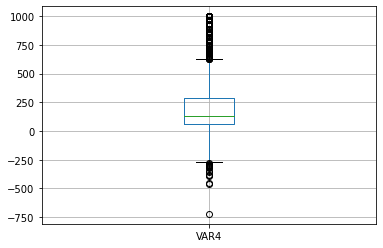

In [ ]:
df_train.boxplot(column = 'VAR4')

In [ ]:
print(len(df_exp.loc[(df_exp['VAR4'] > -300) & (df_exp['VAR4'] < 600)]))
df_exp = df_exp.loc[(df_exp['VAR4'] > -300) & (df_exp['VAR4'] < 600)]

30703


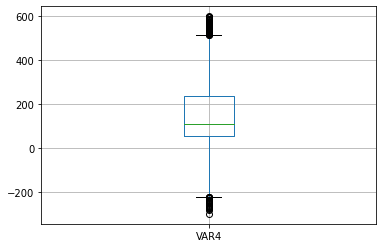

In [ ]:
df_exp.boxplot(column = 'VAR4')

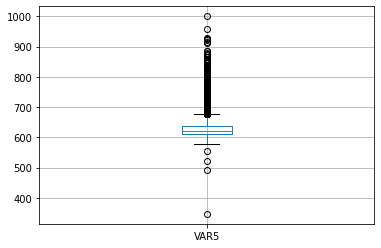

In [ ]:
df_train.boxplot(column = 'VAR5')

In [ ]:
#df_exp = df_exp.loc[(df_exp['VAR5'] > 600) & (df_exp['VAR5'] < 680)]
print(len(df_exp.loc[(df_exp['VAR5'] > 580) & (df_exp['VAR5'] < 670)]))
df_exp = df_exp.loc[(df_exp['VAR5'] > 580) & (df_exp['VAR5'] < 670)]

28244


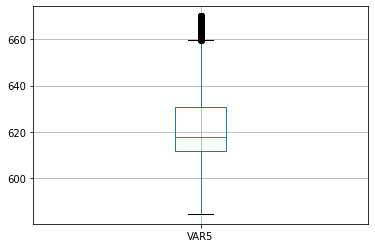

In [ ]:
df_exp.boxplot(column = 'VAR5')

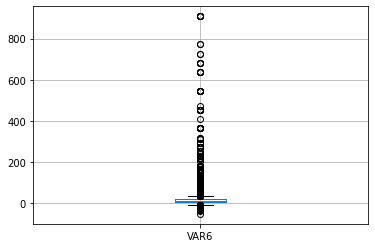

In [ ]:
df_train.boxplot(column = 'VAR6')

In [ ]:
print(len(df_exp.loc[(df_exp['VAR6'] > -10) & (df_exp['VAR6'] < 100)]))
df_exp = df_exp.loc[(df_exp['VAR6'] > -10) & (df_exp['VAR6'] < 100)]

28029


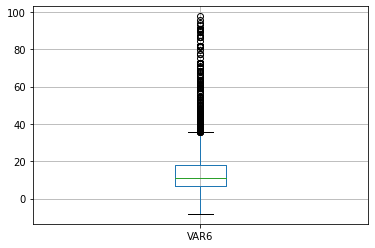

In [ ]:
df_exp.boxplot(column = 'VAR6')

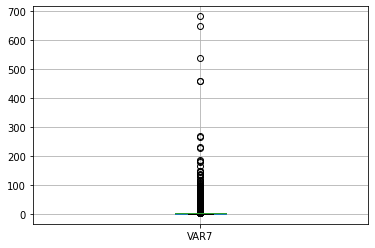

In [ ]:
df_train.boxplot(column = 'VAR7')

In [ ]:
print(len(df_exp.loc[(df_exp['VAR7'] > 0) & (df_exp['VAR7'] < 5)]))
df_exp = df_exp.loc[(df_exp['VAR7'] > 0) & (df_exp['VAR7'] < 5)]

26999


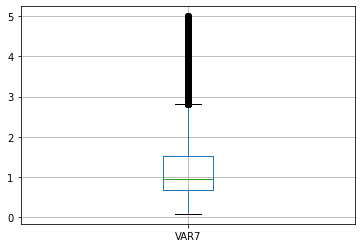

In [ ]:
df_exp.boxplot(column = 'VAR7')

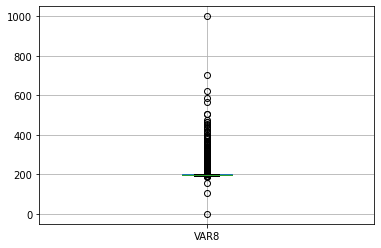

In [ ]:
df_train.boxplot(column = 'VAR8')

In [ ]:
print(len(df_exp.loc[(df_exp['VAR8'] > 195) & (df_exp['VAR8'] < 204)]))
df_exp = df_exp.loc[(df_exp['VAR8'] > 195) & (df_exp['VAR8'] < 204)]

26375


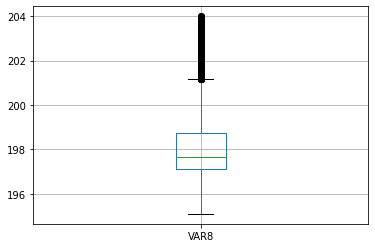

In [ ]:
df_exp.boxplot(column = 'VAR8')

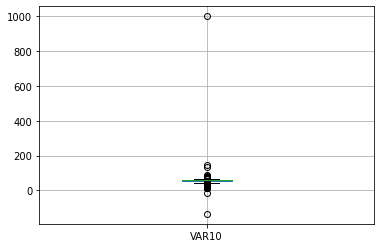

In [ ]:
df_train.boxplot(column = 'VAR10')

In [ ]:
print(len(df_exp.loc[(df_exp['VAR10'] > 46) & (df_exp['VAR10'] < 60)]))
df_exp = df_exp.loc[(df_exp['VAR10'] > 46) & (df_exp['VAR10'] < 60)]

26057


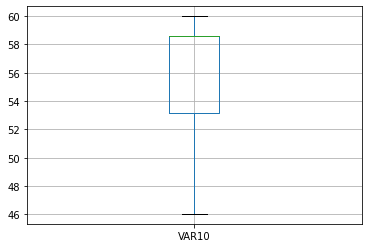

In [ ]:
df_exp.boxplot(column = 'VAR10')

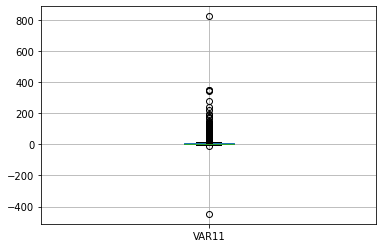

In [ ]:
df_train.boxplot(column = 'VAR11')

In [ ]:
print(len(df_exp.loc[(df_exp['VAR11'] > -20) & (df_exp['VAR11'] < 40)]))
df_exp = df_exp.loc[(df_exp['VAR11'] > 0) & (df_exp['VAR11'] < 40)]

25919


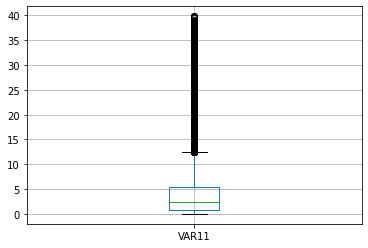

In [ ]:
df_exp.boxplot(column = 'VAR11')

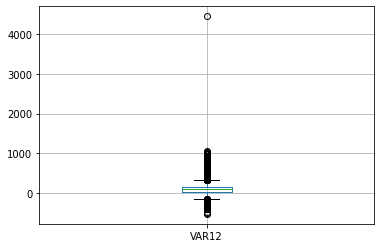

In [ ]:
df_train.boxplot(column = 'VAR12')

In [ ]:
print(len(df_exp.loc[(df_exp['VAR12'] > -100) & (df_exp['VAR12'] < 600)]))
df_exp = df_exp.loc[(df_exp['VAR12'] > -100) & (df_exp['VAR12'] < 600)]

25746


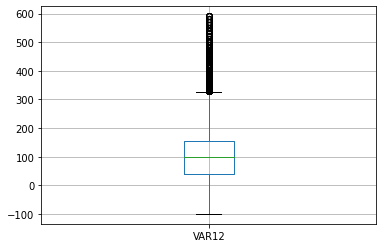

In [ ]:
df_exp.boxplot(column = 'VAR12')

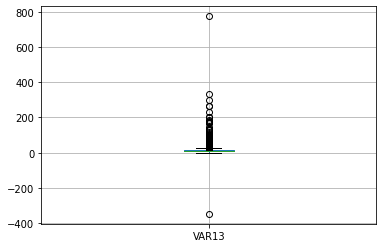

In [ ]:
df_train.boxplot(column = 'VAR13')

In [ ]:
print(len(df_exp.loc[(df_exp['VAR13'] > 0) & (df_exp['VAR13'] < 50)]))
df_exp = df_exp.loc[(df_exp['VAR13'] > 0) & (df_exp['VAR13'] < 50)]

25681


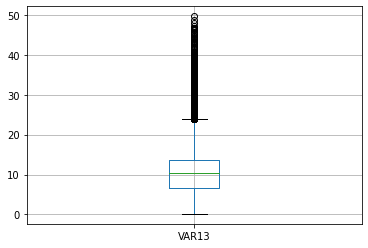

In [ ]:
df_exp.boxplot(column = 'VAR13')

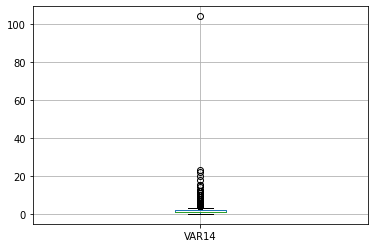

In [ ]:
df_train.boxplot(column = 'VAR14')

In [ ]:
print(len(df_exp.loc[(df_exp['VAR14'] > 0) & (df_exp['VAR14'] < 6)]))
df_exp = df_exp.loc[(df_exp['VAR14'] > 0) & (df_exp['VAR14'] < 6)]

24935


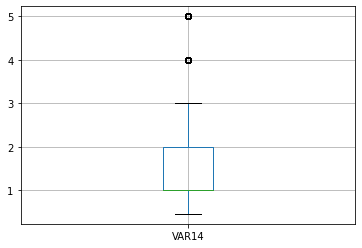

In [ ]:
df_exp.boxplot(column = 'VAR14')

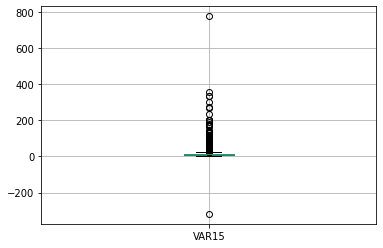

In [ ]:
df_train.boxplot(column = 'VAR15')

In [ ]:
print(len(df_exp.loc[(df_exp['VAR15'] > 0) & (df_exp['VAR15'] < 50)]))
df_exp = df_exp.loc[(df_exp['VAR15'] > 0) & (df_exp['VAR15'] < 50)]

24918


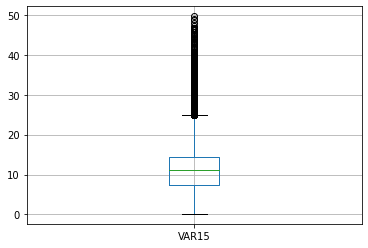

In [ ]:
df_exp.boxplot(column = 'VAR15')

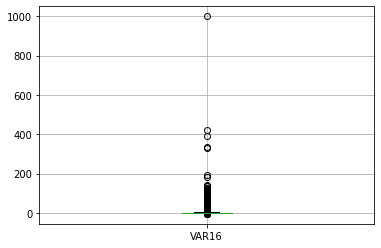

In [ ]:
df_train.boxplot(column = 'VAR16')

In [ ]:
print(len(df_exp.loc[(df_exp['VAR16'] > 0) & (df_exp['VAR16'] < 5)]))
df_exp = df_exp.loc[(df_exp['VAR16'] > 0) & (df_exp['VAR16'] < 5)]

24898


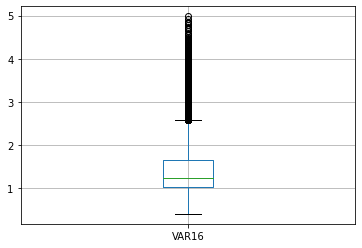

In [ ]:
df_exp.boxplot(column = 'VAR16')

In [ ]:
len(df_exp)

24898

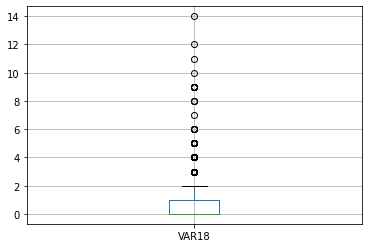

In [ ]:
df_train.boxplot(column = 'VAR18')

In [ ]:
print(len(df_exp.loc[(df_exp['VAR18'] >= 0) & (df_exp['VAR18'] < 5)]))
df_exp = df_exp.loc[(df_exp['VAR18'] >= 0) & (df_exp['VAR18'] < 5)]

24863


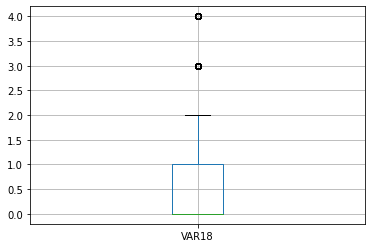

In [ ]:
df_exp.boxplot(column = 'VAR18')

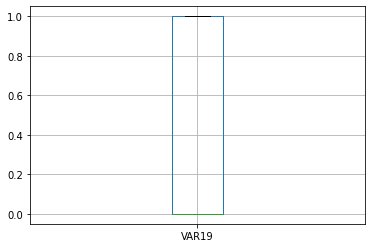

In [ ]:
df_train.boxplot(column = 'VAR19')

In [ ]:
print(len(df_exp.loc[(df_exp['VAR19'] >= 0) & (df_exp['VAR19'] <= 1)]))
#df_exp = df_exp.loc[(df_exp['VAR19'] >= 0) & (df_exp['VAR19'] <= 1)]

24863


In [ ]:
len(df_exp)

24863

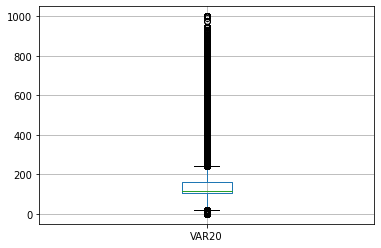

In [ ]:
df_train.boxplot(column = 'VAR20')

In [ ]:
print(len(df_exp.loc[(df_exp['VAR20'] > 50) & (df_exp['VAR20'] < 600)]))
df_exp = df_exp.loc[(df_exp['VAR20'] > 50) & (df_exp['VAR20'] < 600)]

24495


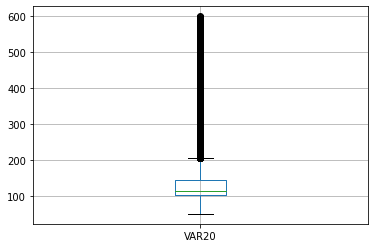

In [ ]:
df_exp.boxplot(column = 'VAR20')

##### LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
df_exp.columns

Index(['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9',
       'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR17',
       'VAR18', 'VAR19', 'VAR20', 'VAR21'],
      dtype='object')

In [ ]:
X = df_exp.iloc[:, 1:-1].values
y = df_exp.iloc[:, 20].values

In [ ]:
y

array(['Low', 'High', 'Medium', ..., 'Medium', 'Low', 'High'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
#X[:, 11] = labelencoder_X.fit_transform(X[:, 11])

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
y

array([1, 0, 2, ..., 2, 1, 0])

In [ ]:
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.5585221473770158


In [ ]:
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.5489999594285289


In [ ]:
#df_exp.to_csv('outliers_removed_itrImputed.csv')

In [ ]:
for i in df_exp.columns[:-1]:
    plt.figure()
    df_exp.hist(column=i,figsize=(7,5),normed=True)

In [ ]:
df_exp.shape

(24497, 22)

In [ ]:
df_exp.head()

,Unnamed: 0,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,...,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
0,0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,63.699984,...,100.083403,1.000000,1.000000,1.000000,1.540594,859.508022,1.0,0.0,100.104991,Low
1,1,2,911.764706,0.027778,238.761364,611.574748,8.181818,1.344479,198.600020,22.086661,...,15.012510,11.050880,1.000000,11.776264,1.614613,869.487400,0.0,1.0,146.654045,High
2,2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,58.890461,...,210.175146,10.000000,1.000000,10.000000,1.044599,728.127337,0.0,0.0,98.249570,Medium
3,3,4,892.941177,0.782091,233.617604,638.076431,9.090909,0.820218,197.355744,4.363431,...,134.651887,9.612582,1.000000,10.163069,1.145729,929.978034,1.0,0.0,140.862306,Low
4,4,5,914.117647,0.083333,196.574005,626.514988,5.181818,1.372928,198.790477,85.938202,...,210.175146,11.549667,1.258089,12.494794,1.558341,720.948316,1.0,0.0,101.268503,High


### Class Imbalance

Text(0, 0.5, 'Frequency')

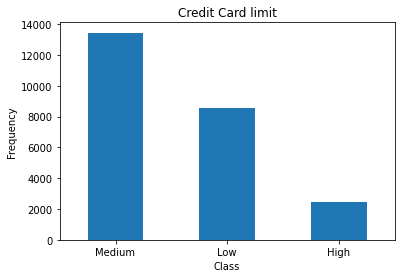

In [ ]:
count_classes = pd.value_counts(df_exp['VAR21'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Credit Card limit")

#plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#!pip install imblearn

In [ ]:
#Create independent and Dependent Features
columns = df_exp.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["VAR21"]]
# Store the variable we are predicting 
target = "VAR21"
# Define a random state 
state = np.random.RandomState(42)
X = df_exp[columns]
Y = df_exp[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(24495, 20)
(24495,)


In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_res.shape,y_res.shape

((37581, 20), (37581,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({'Medium': 13437, 'Low': 8581, 'High': 2477})
Resampled dataset shape Counter({'High': 13150, 'Low': 12288, 'Medium': 12143})


In [ ]:
os =  RandomOverSampler(random_state=42)

In [ ]:
X_train_res, y_train_res = os.fit_sample(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({'Medium': 13437, 'Low': 8581, 'High': 2477})
Resampled dataset shape Counter({'Low': 13437, 'High': 13437, 'Medium': 13437})


Text(0, 0.5, 'Frequency')

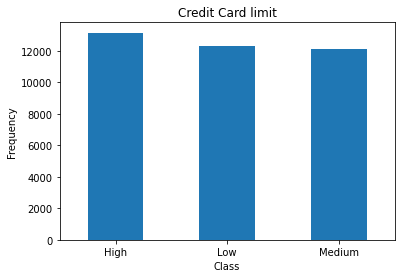

In [ ]:
n_count_classes = pd.value_counts(y_res, sort = True)

n_count_classes.plot(kind = 'bar', rot=0)

plt.title("Credit Card limit")

#plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
%store X_res

In [ ]:
%store y_res

In [ ]:
dfxy = pd.DataFrame(X_res)

In [ ]:
dfxy.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,60.838511,58.632548,0.279273,100.083403,1.000000,1.000000,1.000000,1.540594,852.082798,1.0,0.0,100.104991
1,2.0,911.764706,0.027778,240.807915,611.574748,8.181818,1.344479,198.600020,22.086661,49.712103,5.718678,15.012510,11.269208,1.000000,12.020512,1.614613,883.542803,0.0,1.0,146.654045
2,3.0,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,56.249809,58.632548,0.453212,210.175146,10.000000,1.000000,10.000000,1.044599,728.386869,0.0,0.0,98.249570
3,4.0,892.941177,0.754295,235.205328,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,4.441089,133.762442,8.806072,1.000000,9.790151,1.145729,925.270009,1.0,0.0,140.862306
4,5.0,914.117647,0.083333,196.296807,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,5.235281,210.175146,11.451540,1.265888,12.330236,1.558341,713.026761,1.0,0.0,101.268503


In [ ]:
dfxy['class'] = y_res

In [ ]:
dfxy.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,class
0,1.0,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,60.838511,58.632548,0.279273,100.083403,1.000000,1.000000,1.000000,1.540594,852.082798,1.0,0.0,100.104991,Low
1,2.0,911.764706,0.027778,240.807915,611.574748,8.181818,1.344479,198.600020,22.086661,49.712103,5.718678,15.012510,11.269208,1.000000,12.020512,1.614613,883.542803,0.0,1.0,146.654045,High
2,3.0,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,56.249809,58.632548,0.453212,210.175146,10.000000,1.000000,10.000000,1.044599,728.386869,0.0,0.0,98.249570,Medium
3,4.0,892.941177,0.754295,235.205328,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,4.441089,133.762442,8.806072,1.000000,9.790151,1.145729,925.270009,1.0,0.0,140.862306,Low
4,5.0,914.117647,0.083333,196.296807,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,5.235281,210.175146,11.451540,1.265888,12.330236,1.558341,713.026761,1.0,0.0,101.268503,High


In [ ]:
dfxy.shape

(37572, 22)

In [ ]:
dfxy.to_csv('itrImputed_NoOut_CB.csv')